# Neural network architectures

In [89]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import numpy as np
import tensorflow as tf
from pathlib import Path

from tensorflow.keras        import Sequential, Input, layers
from tensorflow.keras.layers import Dense, Activation

# import visualkeras
from utils.visualkeras.visualkeras_custom_graph import graph_view

In [2]:
hidden_layers = [256, 256, 256, 256, 256, 256, 256, 256, 256]
activation    = 'relu'

In [3]:
def dense_nn(input_shape, output_shape, hidden_layers, activation):
    """ Create a dense NN in base of the parameters received """
    model = Sequential()
    model.add(Input(shape=input_shape))

    for n_layer_nodes in hidden_layers:
        act = tf.keras.layers.LeakyReLU(alpha=0.3) if activation=='LeakyReLU' else Activation(activation)
        model.add(Dense(n_layer_nodes, activation=act))

    model.add(Dense(output_shape))
    return model

In [98]:
input_shape = 94
input_shape = (input_shape,)
model = dense_nn(
    input_shape=input_shape,
    output_shape=1,
    hidden_layers=hidden_layers,
    activation=activation,
)
        
optimizer = tf.keras.optimizers.Adam(
learning_rate=0.001,
beta_1=0.9,
beta_2=0.999,
epsilon=1e-07,
amsgrad=False,
name="Adam",
)
        
model.compile(
    optimizer=optimizer,
    loss="mse",
    metrics=[tf.keras.losses.mse],
)

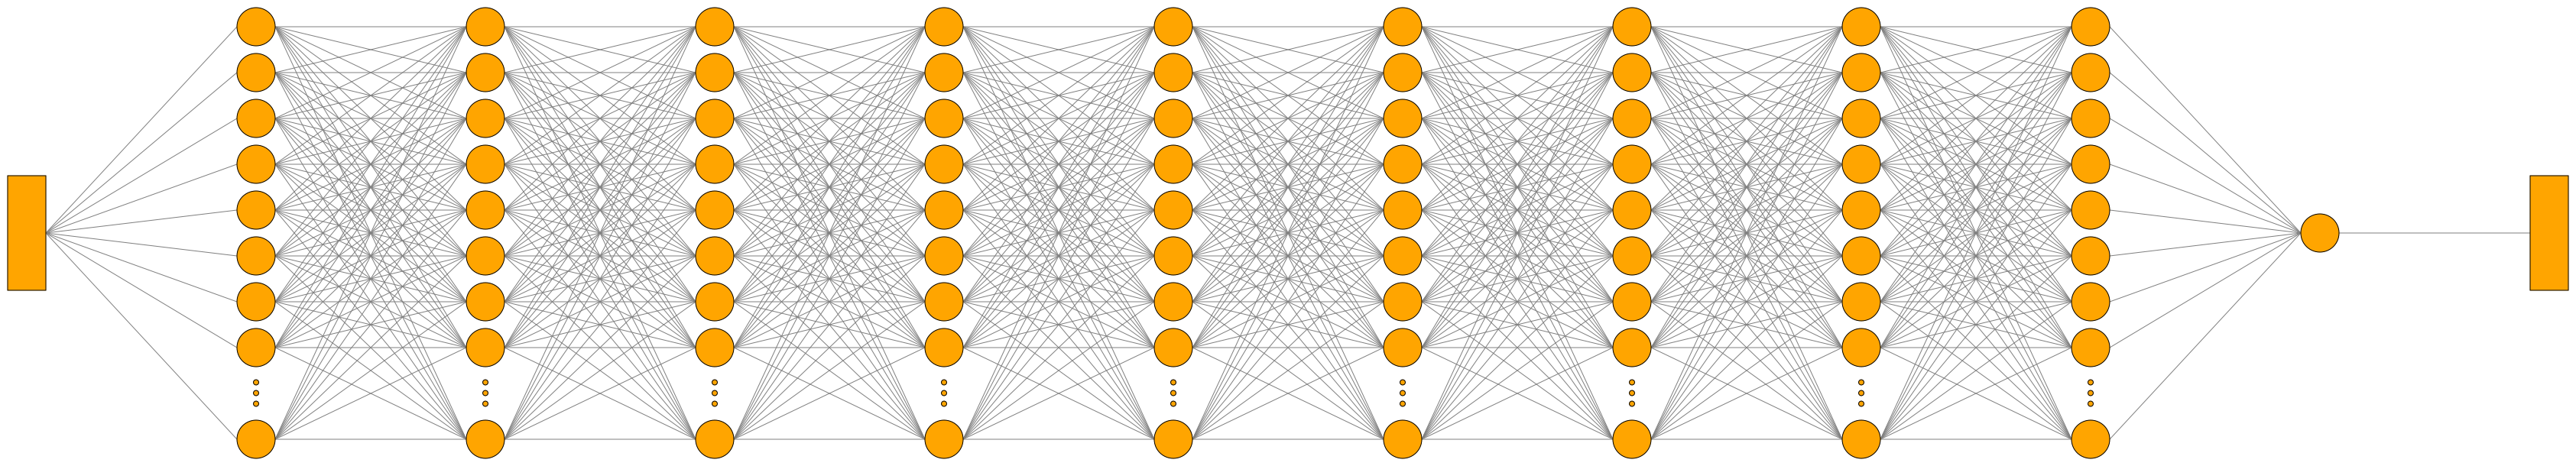

In [99]:
visualkeras.graph_view(model)

In [4]:
'''
To color the input, hidden-layers, and output:
input:  activation = 'tahn'
hl:     activation = 'relu'
output: activation = 'sigmoid'
'''
model = Sequential()
# model.add(Input(shape=94))
model.add(layers.Dense(4, activation='tanh', input_shape=(94,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy']) 
# graph_view(model)

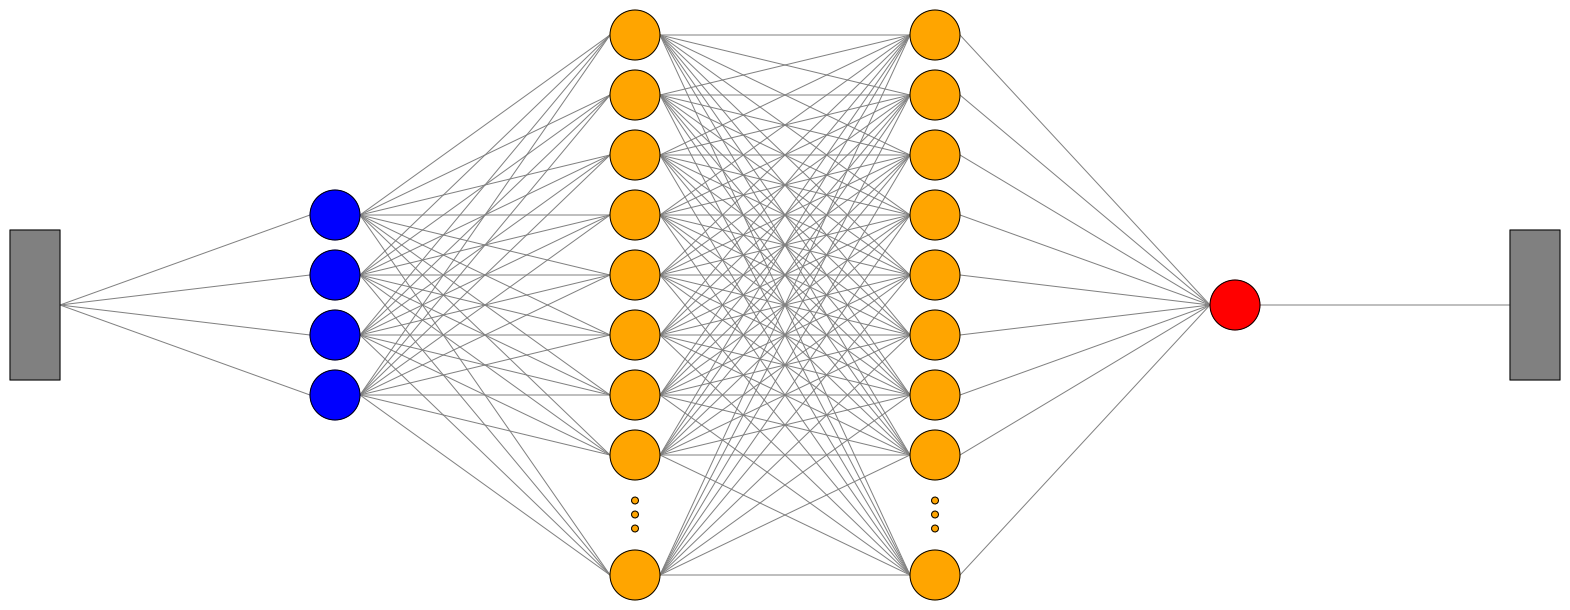

In [5]:
graph_view(
    model,
    to_file = './plots_nn_architectures/causalnn.png',
    color_map = None,
    node_size = 50,
#     background_fill = 'white', 
    padding = 10,
    layer_spacing = 250, 
    node_spacing = 10, 
    connector_fill = 'gray',
    connector_width = 1, 
    ellipsize_after = 10,
    inout_as_tensor = True, 
    show_neurons = True,
)